In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, GRU, Dropout
from keras.optimizers import SGD
import yfinance as yf

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_1293/4082614333.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-21 19:32:23.570914: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 19:32:23.571146: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 19:32:23.573199: I external/local_ts

In [2]:
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

In [3]:
def CNNCreateCompileTest(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse')  

    # Train the model
    model.fit(X_train, y_train, epochs=4, batch_size=16, verbose=2)
    y_pred = model.predict(X_test)

    # Plot the original and predicted time series
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, 
    label='True')
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 
    label='Predicted')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Time Series Forecasting with CNN')
    plt.show()

In [4]:
data = yf.download('gld', '2015-01-01', '2021-01-01')

[*********************100%%**********************]  1 of 1 completed


In [5]:
size = len(data)
Y = data['Adj Close'].values
X = np.arange(size)

In [6]:
train_size = int(0.8 * len(X))
train_data, test_data = Y[:train_size], Y[train_size:]

In [7]:
seq_length=15
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

Epoch 1/4


/home/tea/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


75/75 - 1s - 8ms/step - loss: 1735.1722
Epoch 2/4
75/75 - 0s - 1ms/step - loss: 5.2760
Epoch 3/4
75/75 - 0s - 1ms/step - loss: 5.3383
Epoch 4/4
75/75 - 0s - 1ms/step - loss: 5.2931
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


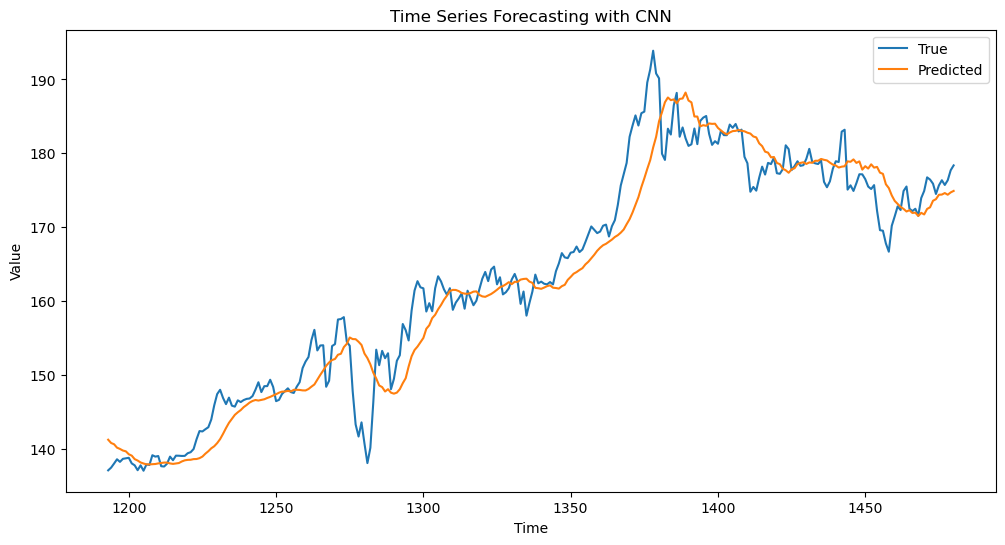

In [8]:
CNNCreateCompileTest(X_train, X_test, y_train, y_test)